In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

from enablence_mux import EBMUX

In [2]:
target_grid_array = np.array([
  1301.47, 1302.60, 1303.73, 1304.87,
  1306.01, 1307.14, 1308.28, 1309.43,
  1310.57, 1311.72, 1312.87, 1314.02,
  1315.17, 1316.33, 1317.48, 1318.64
  ])*1e-9 

wavelength_fabrication = np.array([
  1301.47, 1302.60, 1303.73, 1304.87,
  1306.01, 1307.14, 1308.28, 1309.43,
  1310.57, 1311.72, 1312.87, 1314.02,
  1315.17, 1316.33, 1317.48, 1318.64
  ])*1e-9

In [3]:
sppd_mc_data = xr.open_dataset("sppd_clm_2_mux_drive_current_tuning_calibration_intel_20240226_v0p0.nc")

In [4]:
sppd_mc_data

<xarray.Dataset>
Dimensions:                    (idd_iter: 1001, idd_laser: 16, idd_eb: 1,
                                idd_sppd: 1, idd_bw_lambda: 1)
Coordinates:
  * idd_iter                   (idd_iter) int32 0 1 2 3 4 ... 997 998 999 1000
  * idd_laser                  (idd_laser) int32 0 1 2 3 4 5 ... 11 12 13 14 15
  * idd_eb                     (idd_eb) int32 0
  * idd_sppd                   (idd_sppd) int32 0
  * idd_bw_lambda              (idd_bw_lambda) int32 0
Data variables:
    enablence_mux_mc           (idd_iter, idd_laser, idd_eb) float64 ...
    sppd_laser_mc              (idd_iter, idd_laser, idd_sppd) float64 ...
    wpe_slope_factor_mc        (idd_iter, idd_laser) float64 ...
    nom_temp_array             (idd_iter, idd_eb, idd_sppd, idd_bw_lambda, idd_laser) float64 ...
    peak_current_array         (idd_iter, idd_eb, idd_sppd, idd_bw_lambda, idd_laser) float64 ...
    output_power_array         (idd_iter, idd_eb, idd_sppd, idd_bw_lambda, idd_laser) float64 ...
    output_lambda_array        (idd_iter, idd_eb, idd_sppd, idd_bw_lambda, idd_laser) float64 ...
    drive_current_array        (idd_iter, idd_eb, idd_sppd, idd_bw_lambda, idd_laser) float64 ...
    tec_set_point_temperature  (idd_iter, idd_eb, idd_sppd, idd_bw_lambda) float64 ...
    warning_flag               (idd_iter, idd_eb, idd_sppd, idd_bw_lambda) int32 ...
Attributes:
    description:  SPPD CLM Calibration data for Monte Carlo simulations - dat...

In [5]:
enablence_mux_bw_lambda = np.array([20])/17*0.1e-9
enablence_mux_3sigma = np.array([10])/17*0.1e-9
sppd_laser_3sigma = np.array([38])/17*0.1e-9

no_lasers = 16
no_iterations = 1001

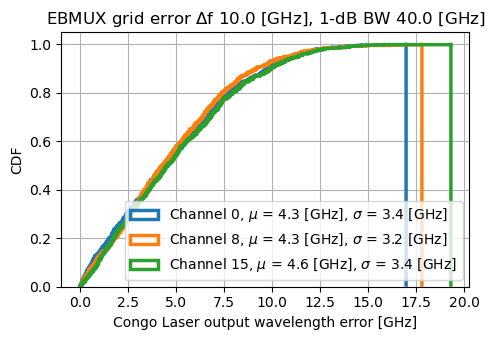

In [6]:
plt.figure(figsize=(5,3.5))
for idd_laser in range(3):
  for idd_bw_lambda in range(1):
    plt.subplot(1, 1,1)
    idd_laser_updated = idd_laser*8
    if idd_laser == 2:
      idd_laser_updated = idd_laser * 8 -1
    lambda_ch = sppd_mc_data['output_lambda_array'].sel(idd_eb = 0, idd_sppd = 0, idd_bw_lambda = idd_bw_lambda, idd_laser=idd_laser_updated).values
    median = np.median(np.abs(lambda_ch*1e9-wavelength_fabrication[idd_laser_updated]*1e9)/0.1*17)
    std = np.std(np.abs(lambda_ch*1e9-wavelength_fabrication[idd_laser_updated]*1e9)/0.1*17)
    plt.hist(np.abs(lambda_ch*1e9-wavelength_fabrication[idd_laser_updated]*1e9)/0.1*17, bins=1001, density=True, cumulative = True, linewidth=2.5, histtype = 'step', label=f'Channel {idd_laser_updated}, '+r'$\mu$ = '+f'{median:0.1f} [GHz], $\sigma$ = '+f'{std:0.1f} [GHz]')
    plt.legend()
    # plt.xlim([0, 40]) 
    # plt.ylim([0,1])
    plt.grid(True)
    plt.title(r'EBMUX grid error $\Delta$f '+f'{enablence_mux_3sigma[0]/0.1e-9*17:0.1f} [GHz], 1-dB BW {enablence_mux_bw_lambda[idd_bw_lambda]/0.1e-9*34:0.1f} [GHz]')
    plt.xlabel('Congo Laser output wavelength error [GHz]')
    plt.ylabel('CDF')
plt.tight_layout()

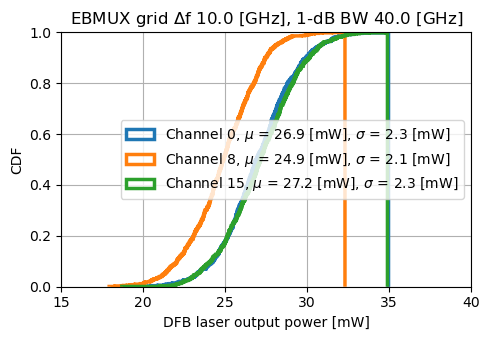

In [7]:
plt.figure(figsize=(5,3.5))
for idd_laser in range(3):
  for idd_bw_lambda in range(1):
    plt.subplot(1, 1,1)
    idd_laser_updated = idd_laser*8
    if idd_laser == 2:
      idd_laser_updated = idd_laser * 8 -1
    power_ch = sppd_mc_data['output_power_array'].sel(idd_eb = 0, idd_sppd = 0, idd_bw_lambda = idd_bw_lambda, idd_laser=idd_laser_updated).values / 10**(-2.3/10)
    median = np.median(power_ch/1e-3)
    std = np.std(power_ch/1e-3)
    plt.hist(power_ch/1e-3, bins=1001, density=True, cumulative = True, linewidth=2.5, histtype = 'step', label=f'Channel {idd_laser_updated}, '+r'$\mu$ = '+f'{median:0.1f} [mW], $\sigma$ = '+f'{std:0.1f} [mW]')
    plt.legend()
    plt.xlim([15, 40]) 
    plt.xticks(np.arange(15, 45, 5))
    plt.ylim([0,1])
    plt.grid(True)
    plt.title(r'EBMUX grid $\Delta$f '+f'{enablence_mux_3sigma[0]/0.1e-9*17:0.1f} [GHz], 1-dB BW {enablence_mux_bw_lambda[idd_bw_lambda]/0.1e-9*34:0.1f} [GHz]')
    plt.xlabel('DFB laser output power [mW]')
    plt.ylabel('CDF')
plt.tight_layout()

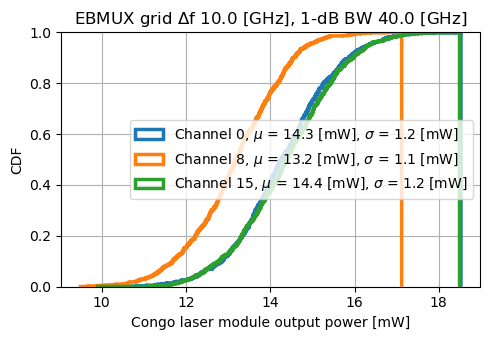

In [8]:
plt.figure(figsize=(5,3.5))
for idd_laser in range(3):
  for idd_bw_lambda in range(1):
    plt.subplot(1, 1, 1)
    idd_laser_updated = idd_laser*8
    if idd_laser == 2:
      idd_laser_updated = idd_laser * 8 -1
    power_ch = sppd_mc_data['output_power_array'].sel(idd_eb = 0, idd_sppd = 0, idd_bw_lambda = idd_bw_lambda, idd_laser=idd_laser_updated).values *0.9
    median = np.median(power_ch/1e-3)
    std = np.std(power_ch/1e-3)
    plt.hist(power_ch/1e-3, bins=1001, density=True, cumulative = True, linewidth=2.5, histtype = 'step', label=f'Channel {idd_laser_updated}, '+r'$\mu$ = '+f'{median:0.1f} [mW], $\sigma$ = '+f'{std:0.1f} [mW]')
    plt.legend()
    # plt.xlim([12, 13.5]) 
    # plt.xticks(np.arange(12, 13.75, 0.25))
    plt.ylim([0,1])
    plt.grid(True)
    plt.title(r'EBMUX grid $\Delta$f '+f'{enablence_mux_3sigma[0]/0.1e-9*17:0.1f} [GHz], 1-dB BW {enablence_mux_bw_lambda[idd_bw_lambda]/0.1e-9*34:0.1f} [GHz]')
    plt.xlabel('Congo laser module output power [mW]')
    plt.ylabel('CDF')
plt.tight_layout()

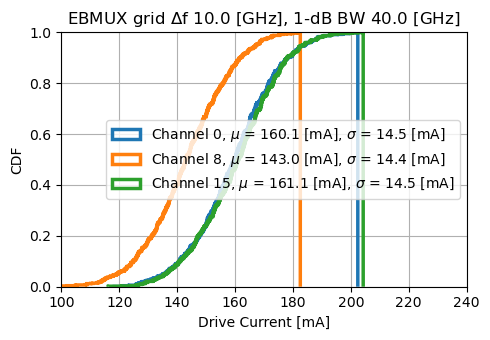

In [9]:
plt.figure(figsize=(5,3.5))
for idd_laser in range(3):
  for idd_bw_lambda in range(1):
    plt.subplot(1, 1, 1)
    idd_laser_updated = idd_laser*8
    if idd_laser == 2:
      idd_laser_updated = idd_laser * 8 -1
    drive_current_ch = sppd_mc_data['drive_current_array'].sel(idd_eb = 0, idd_sppd = 0, idd_bw_lambda = idd_bw_lambda, idd_laser=idd_laser_updated).values
    median = np.median(drive_current_ch/1e-3)
    std = np.std(drive_current_ch/1e-3)
    plt.hist(drive_current_ch/1e-3, bins=1001, density=True, cumulative = True, linewidth=2.5, histtype = 'step', label=f'Channel {idd_laser_updated}, '+r'$\mu$ = '+f'{median:0.1f} [mA], $\sigma$ = '+f'{std:0.1f} [mA]')
    plt.legend()
    plt.xlim([100, 240]) 
    plt.xticks(np.arange(100, 260, 20))
    plt.ylim([0,1])
    plt.grid(True)
    plt.title(r'EBMUX grid $\Delta$f '+f'{enablence_mux_3sigma[0]/0.1e-9*17:0.1f} [GHz], 1-dB BW {enablence_mux_bw_lambda[idd_bw_lambda]/0.1e-9*34:0.1f} [GHz]')
    plt.xlabel('Drive Current [mA]')
    plt.ylabel('CDF')
plt.tight_layout()